# Credit Card Fraud Detection 
## Anonymized 2023 European Credit Card Transactions

Data source: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/

Objective: To compare the performance of K Nearest Neighbors, Random Forest Classifiers, Logistic Regression, Decision Tree Classifiers, Support Vector Machine, and Neural Networks in the accurate detection of fraud based on anonymized European credit card transaction data from 2023.  

Data Description: 

568,630 rows

28 anonymized features representing things such as time, location, etc.

Amount: Standardized to Euros, including British transactions.

Class:  0 = not fraud, 1 = fraudulent

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from tqdm import tqdm
from time import time
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
data = pd.read_csv('capstone_data/creditcard_2023.csv')

# Exploratory Data Analysis

In [3]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

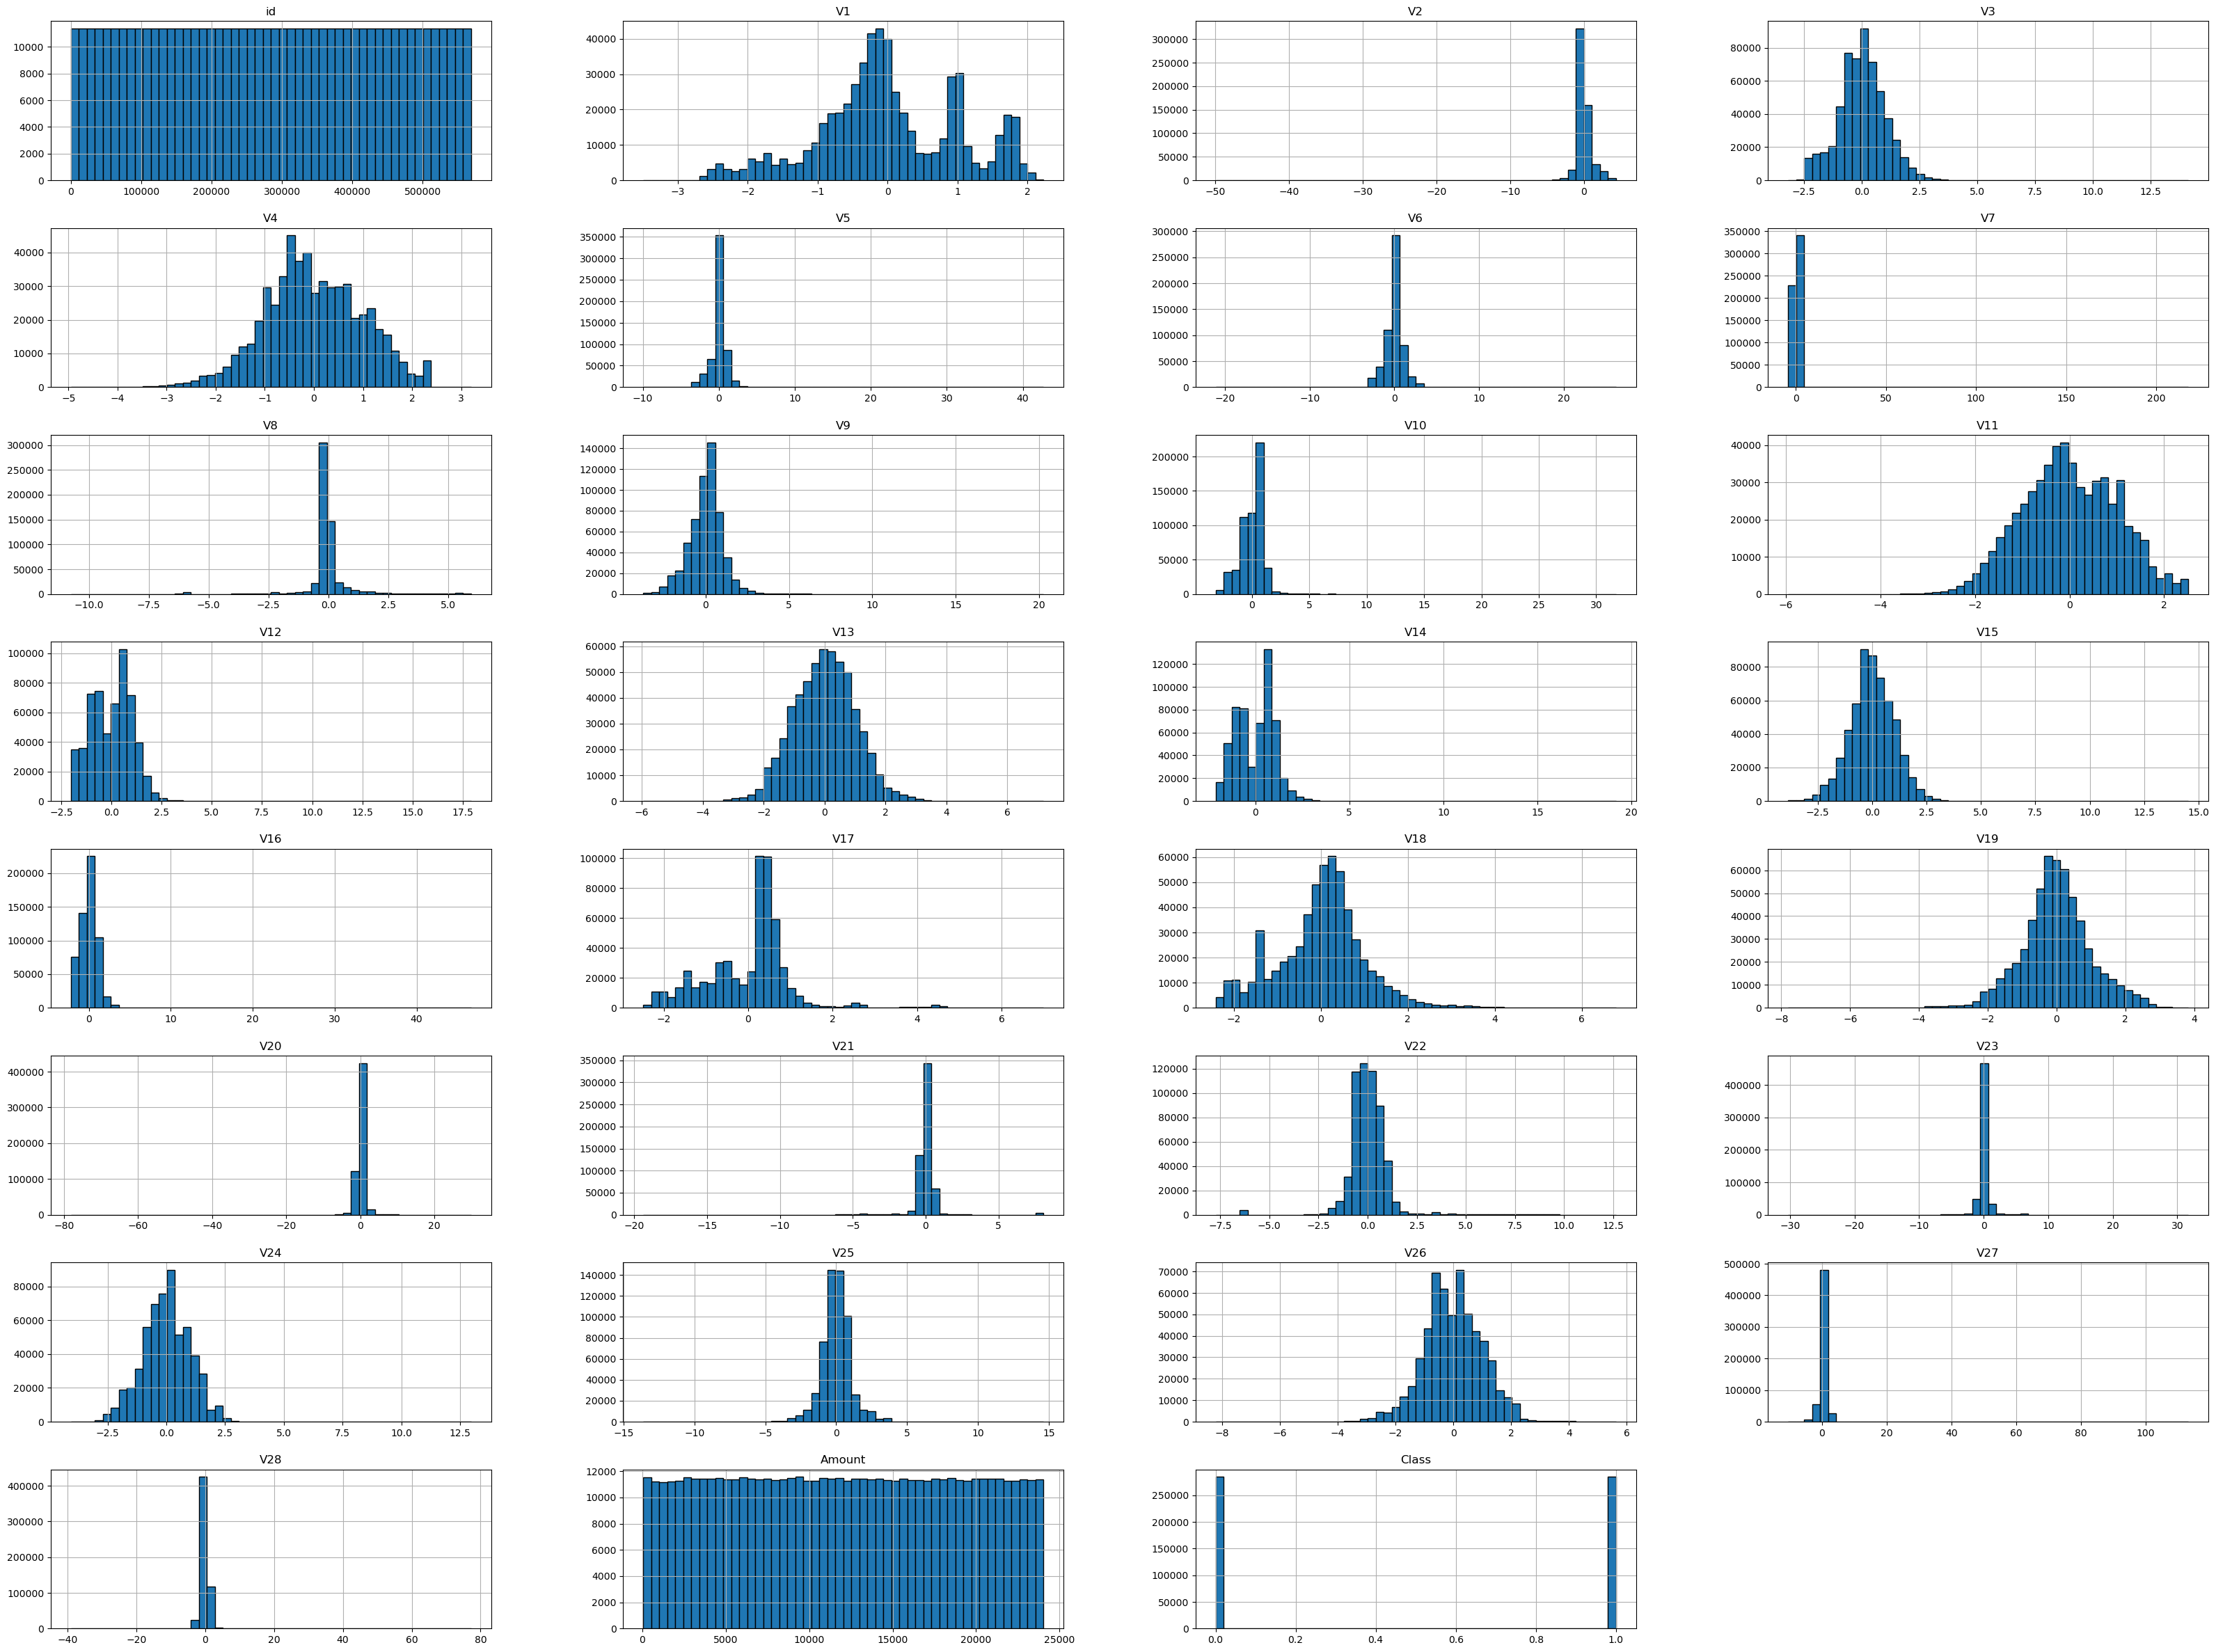

In [6]:
data.hist(figsize=(40, 30), bins=50, layout=(8, 4), edgecolor='black')
plt.tight_layout

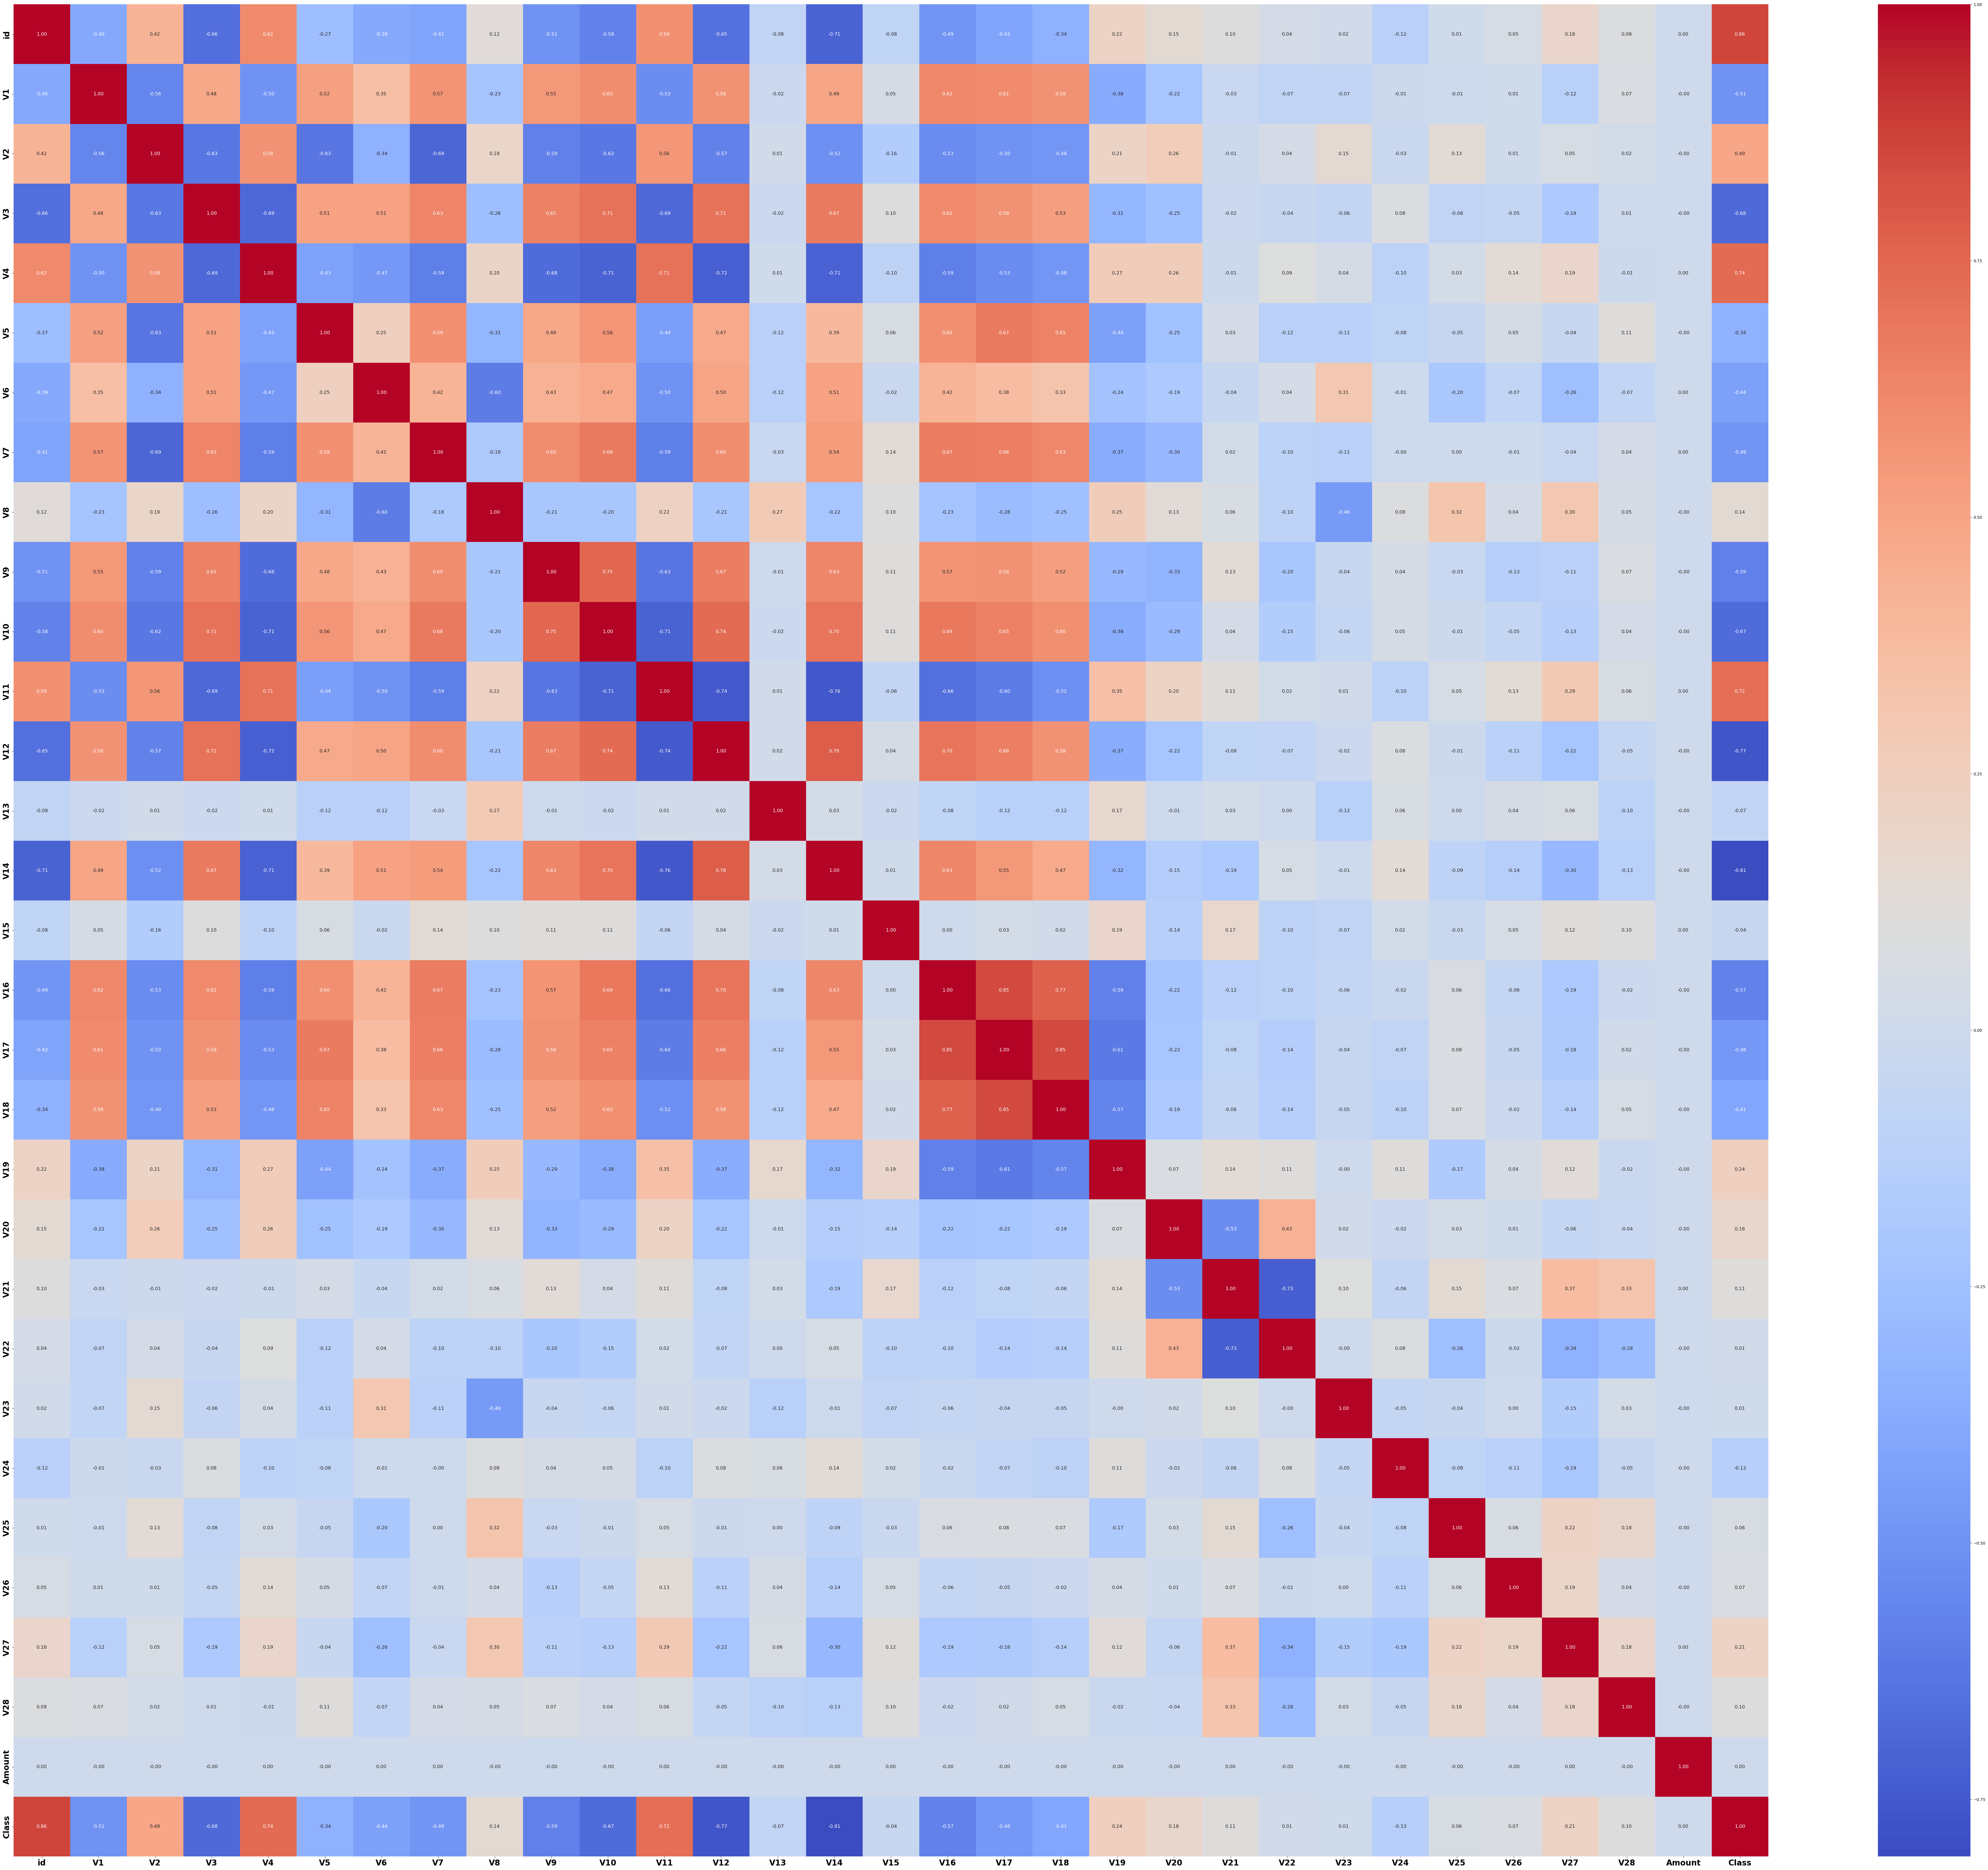

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations
corr = data.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(100, 85))

# Create a heatmap with larger annotations
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'size': 12})

# Increase font size for labels for better readability
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

# Show the plot
plt.show()


In [8]:
# Set the size for the boxplots
plt.figure(figsize=(100, 75))

# Plot boxplots for each of the V1-V28 features and Amount
for i, col in enumerate(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']):
    plt.subplot(7, 5, i + 1)  # 7 rows, 5 columns
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()

# Show the plot
plt.show()


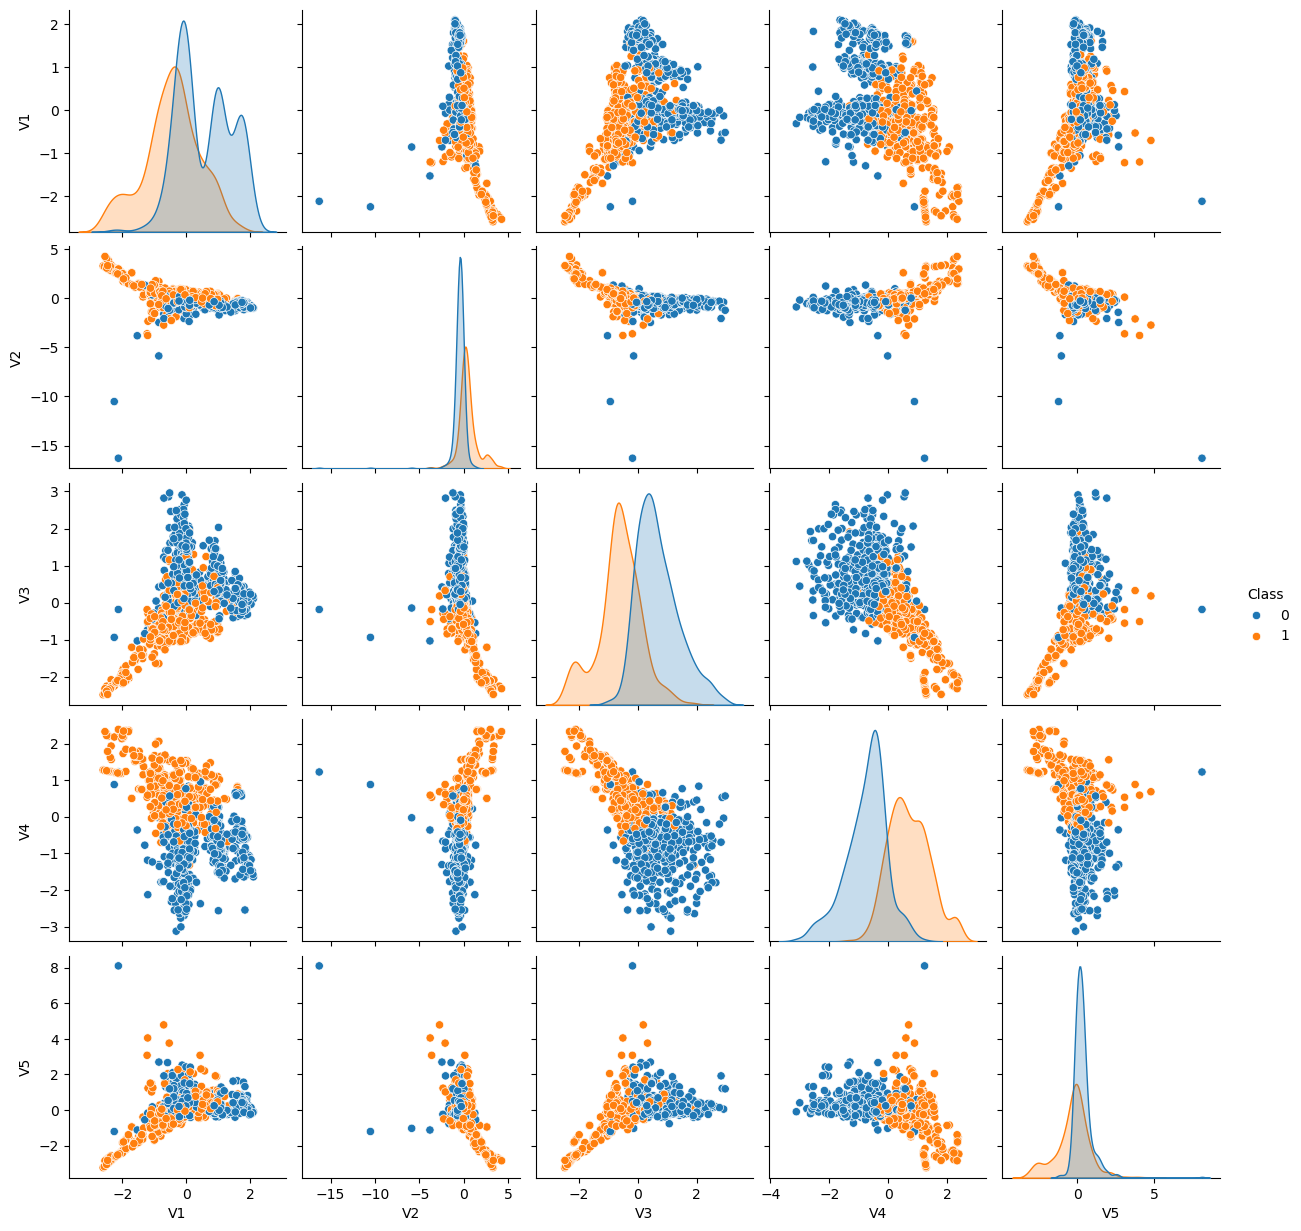

In [9]:
# Sampling a subset of the data to make the pairplot manageable
sample_data = data[['V1', 'V2', 'V3', 'V4', 'V5', 'Class']].sample(n=1000, random_state=1)

# Create a pairplot
sns.pairplot(sample_data, hue='Class')

# Show the plot
plt.show()


In [10]:
# Check for null values
null_values = data.isnull().sum()

# Print the number of null values for each column
print(null_values)


id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
# Count the occurrences of each class in the 'Class' column
class_counts = data['Class'].value_counts()

# Print the counts for each class
print(class_counts)


Class
0    284315
1    284315
Name: count, dtype: int64


# Observations

In real-world credit card transaction datasets, it's quite rare to have a perfect balance between fraudulent and non-fraudulent transactions, as fraud is generally a small fraction of all transactions. However, for the purposes of machine learning and particularly for educational datasets, it's not uncommon for the data to be sampled or constructed in such a way to create a balanced dataset. This can be done to simplify the learning process and to ensure that the performance of predictive models isn't biased by a class imbalance.

A perfectly balanced dataset can be helpful for certain types of analysis and model training, as it allows you to focus on the accuracy of predictions without having to account for the skew in class distributions. However, it is also important to recognize that such a balance is artificial and that real-world performance would need to account for the typically imbalanced nature of fraud data.

This dataset can be used to create useful baseline models which would then need to be provided with a much larger dataset containing a complete anonymized list of European credit card transactions over the past 3 months to assess performance and optimize.  I suspect an ensambling model combining an optimized neural network, KNN, and Decision Tree would yield the best results on the full data, however, due to this data not being publically available I am unfortunately unable to proceed further.

### Importantly, no encoding is necessary due to the entire dataset already being anonymized, with all non-numeric variables either removed or encoded to comply with privacy & data laws.  

# Test Train Split & Creation of Evaluation DataFrame

In [12]:
# Features and target variable
X = data.drop('Class', axis=1)  # all columns except 'Class'
y = data['Class']  # only the 'Class' column

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the size of the resulting splits
print(f"Training set has {X_train.shape[0]} rows and Testing set has {X_test.shape[0]} rows.")


Training set has 398041 rows and Testing set has 170589 rows.


In [13]:
# Define the columns of the DataFrame
columns = ['Model', 'Train Time', 'Train F1 Score', 'Test F1 Score']

# Create an empty DataFrame for storing model performance data
model_performance_df = pd.DataFrame(columns=columns)

# Display the empty DataFrame
model_performance_df



,Model,Train Time,Train F1 Score,Test F1 Score


# K Nearest Neighbors

In [14]:
from sklearn.metrics import accuracy_score, f1_score # import f1_score function
from time import time
# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# Record the start time
start_time = time()
# Fit the model to the training data
knn.fit(X_train.values, y_train.values)
# Record the training time
knn_train_time = time() - start_time
# Make predictions on the training data
knn_pred_train = knn.predict(X_train.values)
# Calculate the F1 accuracy of the predictions on the training data
knn_accuracy_train = f1_score(y_train.values, knn_pred_train)
# Make predictions on the test data
knn_pred_test = knn.predict(X_test.values)
# Calculate the F1 accuracy of the predictions on the test data
knn_accuracy_test = f1_score(y_test.values, knn_pred_test)
# Determine the next index to use for the new row
next_index = len(model_performance_df)

# Insert the new data
model_performance_df.loc[next_index] = ['KNN', knn_train_time, knn_accuracy_train, knn_accuracy_test]

# Display the updated DataFrame
print(model_performance_df)




  Model  Train Time  Train F1 Score  Test F1 Score
0   KNN    0.050033        0.999044       0.999104


Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



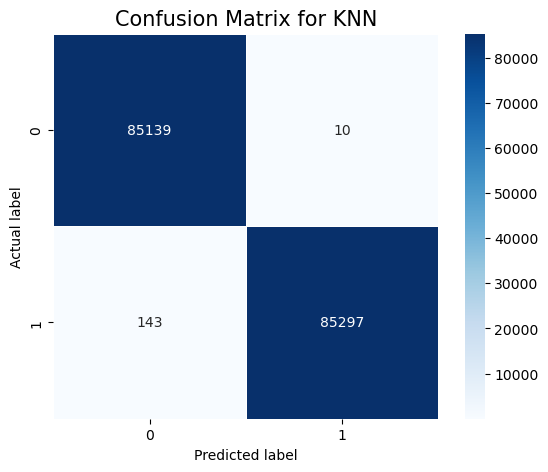

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report for KNN
print("Classification Report for KNN:")
print(classification_report(y_test, knn.predict(X_test)))

# Print confusion matrix for KNN
cm_knn = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(figsize=(7,5))
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for KNN', size=15)
plt.show()


# Logistic Regression

                 Model  Train Time  Train F1 Score  Test F1 Score
0                  KNN    0.050033        0.999044       0.999104
1  Logistic Regression    0.421660        0.815017       0.813513
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76     85149
           1       0.73      0.92      0.81     85440

    accuracy                           0.79    170589
   macro avg       0.81      0.79      0.79    170589
weighted avg       0.81      0.79      0.79    170589



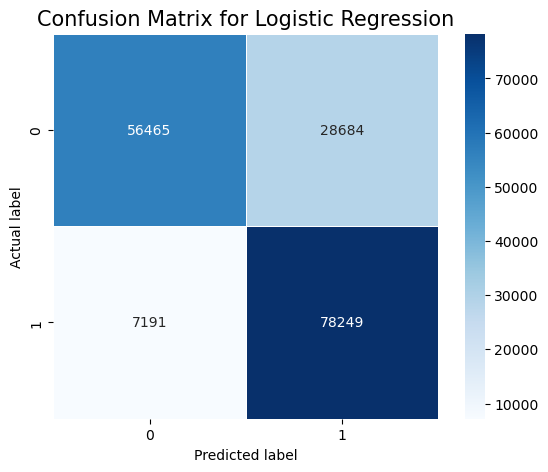

In [16]:
# Create an instance of LogisticRegression
log_reg = LogisticRegression()

# Record the start time
start_time = time()

# Fit the model to the training data
log_reg.fit(X_train.values, y_train.values)

# Record the training time
log_reg_train_time = time() - start_time

# Make predictions on the training data
log_reg_pred_train = log_reg.predict(X_train.values)

# Calculate the F1 accuracy of the predictions on the training data
log_reg_accuracy_train = f1_score(y_train.values, log_reg_pred_train)

# Make predictions on the test data
log_reg_pred_test = log_reg.predict(X_test.values)

# Calculate the F1 accuracy of the predictions on the test data
log_reg_accuracy_test = f1_score(y_test.values, log_reg_pred_test)

# Determine the next index to use for the new row
next_index = len(model_performance_df)

# Insert the new data
model_performance_df.loc[next_index] = ['Logistic Regression', log_reg_train_time, log_reg_accuracy_train, log_reg_accuracy_test]

# Display the updated DataFrame
print(model_performance_df)

# Print classification report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, log_reg.predict(X_test)))

# Print confusion matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, log_reg_pred_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm_log_reg, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Logistic Regression', size=15)
plt.show()


# Random Forest

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



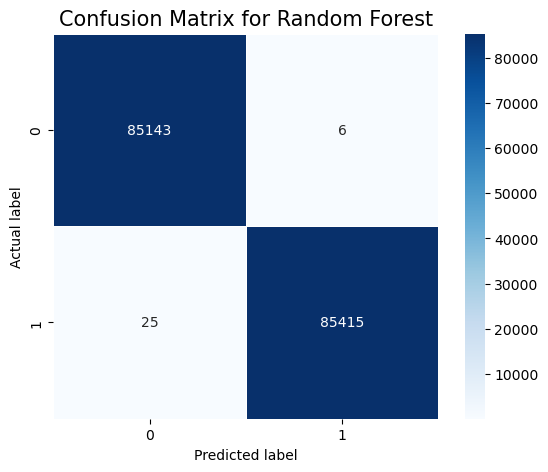

In [17]:
# Create an instance of RandomForestClassifier
rf = RandomForestClassifier()

# Record the start time
start_time = time()

# Fit the model to the training data
rf.fit(X_train.values, y_train.values)

# Record the training time
rf_train_time = time() - start_time

# Make predictions on the training data
rf_pred_train = rf.predict(X_train.values)

# Calculate the F1 score of the predictions on the training data
rf_accuracy_train = f1_score(y_train.values, rf_pred_train)

# Make predictions on the test data
rf_pred_test = rf.predict(X_test.values)

# Calculate the F1 score of the predictions on the test data
rf_accuracy_test = f1_score(y_test.values, rf_pred_test)

# Insert the new data into the DataFrame
next_index = len(model_performance_df)
model_performance_df.loc[next_index] = ['Random Forest', rf_train_time, rf_accuracy_train, rf_accuracy_test]

# Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_pred_test))

# Print confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Random Forest', size=15)
plt.show()


# Decision Tree Classifier

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



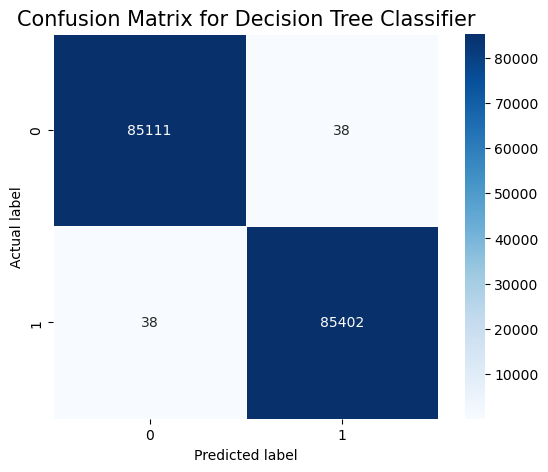

In [18]:
# Create an instance of DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Record the start time
start_time = time()

# Fit the model to the training data
dtc.fit(X_train.values, y_train.values)

# Record the training time
dtc_train_time = time() - start_time

# Make predictions on the training data
dtc_pred_train = dtc.predict(X_train.values)

# Calculate the F1 score of the predictions on the training data
dtc_accuracy_train = f1_score(y_train.values, dtc_pred_train)

# Make predictions on the test data
dtc_pred_test = dtc.predict(X_test.values)

# Calculate the F1 score of the predictions on the test data
dtc_accuracy_test = f1_score(y_test.values, dtc_pred_test)

# Insert the new data into the DataFrame
next_index = len(model_performance_df)
model_performance_df.loc[next_index] = ['Decision Tree', dtc_train_time, dtc_accuracy_train, dtc_accuracy_test]

# Print classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dtc_pred_test))

# Print confusion matrix
cm_dtc = confusion_matrix(y_test, dtc_pred_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm_dtc, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Decision Tree Classifier', size=15)
plt.show()


# Support Vector Machine

Classification Report for SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



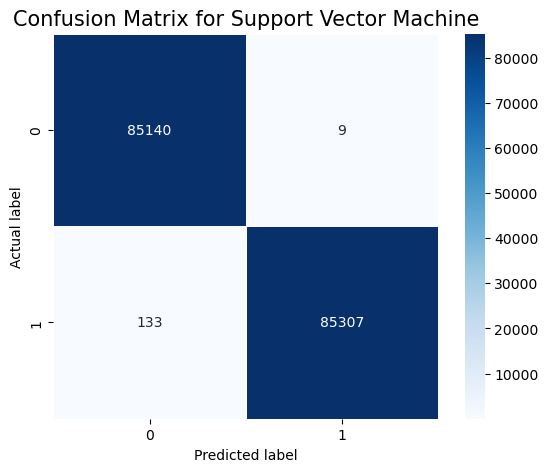

In [19]:
# Create an instance of SVC with probability enabled to resolve error with Ensamble model
svc = SVC(probability=True)

# Record the start time
start_time = time()

# Fit the model to the training data
svc.fit(X_train.values, y_train.values)

# Record the training time
svc_train_time = time() - start_time

# Make predictions on the training data
svc_pred_train = svc.predict(X_train.values)

# Calculate the F1 score of the predictions on the training data
svc_accuracy_train = f1_score(y_train.values, svc_pred_train)

# Make predictions on the test data
svc_pred_test = svc.predict(X_test.values)

# Calculate the F1 score of the predictions on the test data
svc_accuracy_test = f1_score(y_test.values, svc_pred_test)

# Insert the new data into the DataFrame
next_index = len(model_performance_df)
model_performance_df.loc[next_index] = ['SVC', svc_train_time, svc_accuracy_train, svc_accuracy_test]

# Print classification report
print("Classification Report for SVC:")
print(classification_report(y_test, svc_pred_test))

# Print confusion matrix
cm_svc = confusion_matrix(y_test, svc_pred_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm_svc, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Support Vector Machine', size=15)
plt.show()


5331/5331 [==============================] - 5s 848us/step
Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



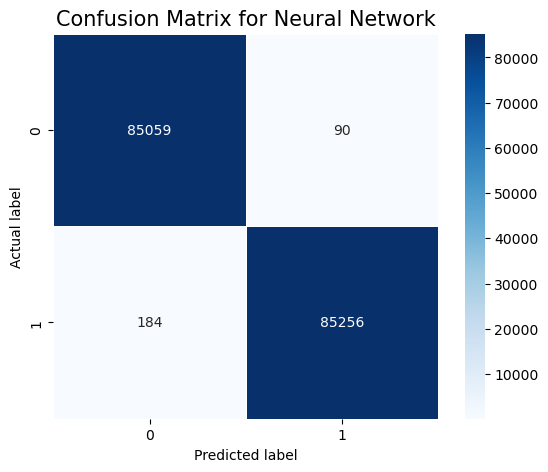

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Record the start time
start_time = time()

# Fit the model to the training data
history = model.fit(X_train.values, y_train.values, epochs=10, batch_size=32, verbose=0)

# Record the training time
nn_train_time = time() - start_time

# Make predictions on the training data
nn_pred_train = (model.predict(X_train.values) > 0.5).astype(int)

# Calculate the F1 score of the predictions on the training data
nn_accuracy_train = f1_score(y_train.values, nn_pred_train)

# Make predictions on the test data
nn_pred_test = (model.predict(X_test.values) > 0.5).astype(int)

# Calculate the F1 score of the predictions on the test data
nn_accuracy_test = f1_score(y_test.values, nn_pred_test)

# Insert the new data into the DataFrame
next_index = len(model_performance_df)
model_performance_df.loc[next_index] = ['Neural Network', nn_train_time, nn_accuracy_train, nn_accuracy_test]

# Print classification report
print("Classification Report for Neural Network:")
print(classification_report(y_test, nn_pred_test))

# Print confusion matrix
cm_nn = confusion_matrix(y_test, nn_pred_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm_nn, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Neural Network', size=15)
plt.show()


In [21]:
model_performance_df = model_performance_df.sort_values(by='Test F1 Score', ascending=False)
model_performance_df

,Model,Train Time,Train F1 Score,Test F1 Score
2,Random Forest,300.261691,1.000000,0.999819
3,Decision Tree,24.269384,1.000000,0.999555
4,SVC,5307.352064,0.999039,0.999168
0,KNN,0.050033,0.999044,0.999104
5,Neural Network,133.875852,0.998221,0.998396
1,Logistic Regression,0.421660,0.815017,0.813513


Random Forest is the top performer, with only 30 errors across the entire dataset, with 24 being false negatives and the remaining 6 false positives.  99.98% accuracy on 170,589 records is highly impressive.

The underperformance of Neural Network and Logistic Regression stood out - will optimize for the sake of experimentation.

# Optimized Neural Network

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform, randint

# Define a neural network classifier
nn_clf = MLPClassifier()

# Specify parameters and distributions to sample from
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(0.0001, 0.001),
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init': uniform(0.001, 0.01),
}

# Specify the RandomizedSearchCV object
random_search = RandomizedSearchCV(nn_clf, param_distributions=param_dist,
                                   n_iter=100, n_jobs=-1, cv=5, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.0010795105286215087, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0011716110183175024, 'solver': 'adam'}
Best score found:  0.9823385780832176


activation: 'relu': The rectified linear activation function is one of the most common and effective choices for hidden layers in neural networks, particularly for deep learning. Its simplicity allows for faster computation and it addresses the vanishing gradient problem, allowing models to learn faster and perform better.

alpha: 0.0010795105286215087: This is the L2 regularization term which helps prevent overfitting by penalizing large weights. The value here indicates a balance between too much regularization (which could underfit the model) and too little (which could allow overfitting).

hidden_layer_sizes: (50,): This suggests that a single hidden layer with 50 neurons is sufficient for the model to capture the complexity of the data. It's often surprising how effective a single-layer network can be when properly regularized and tuned.

learning_rate: 'adaptive': This means that the learning rate remains constant as long as the training loss keeps decreasing. It decreases when the loss starts to plateau, which can help in fine-tuning the model's convergence.

learning_rate_init: 0.0011716110183175024: The initial learning rate is set to a value that allows the optimizer to take sufficiently large steps during the initial phases of training but not so large as to cause instability.

solver: 'adam': The Adam optimizer is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks. It's well-suited to large datasets and high-dimensional spaces, which might be why it performed well with your data.

An improvement in the best score to 0.9715 is significant and suggests that the optimization process was successful in finding a set of hyperparameters that work well


### Random Forest still stands out as our best model for this task.

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier


# Define the neural network architecture
def create_nn():
    nn_model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn_model

# Create the KerasClassifier wrapper for the neural network
nn = KerasClassifier(build_fn=create_nn, epochs=10, batch_size=32, verbose=0)
nn._estimator_type = "classifier"

# Create the VotingClassifier with all models including the neural network
voting_clf = VotingClassifier(estimators=[
    ('knn', knn), ('rf', rf), ('dtc', dtc), ('svc', svc), ('nn', nn)],
    voting='soft')

# Fit the VotingClassifier with the training data
voting_clf.fit(X_train, y_train)

# Making predictions with the VotingClassifier
voting_predictions = voting_clf.predict(X_test)

# Calculating the F1 score for the VotingClassifier's predictions
voting_f1_score = f1_score(y_test, voting_predictions)
print("F1 Score for Voting Classifier: ", voting_f1_score)



5331/5331 [==============================] - 4s 797us/step
F1 Score for Voting Classifier:  0.9995257694536981


In [23]:
# Create the VotingClassifier with just Random Forest, DTC and Neural Network
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('dtc', dtc), ('nn', nn)],  # 'nn' needs to be a KerasClassifier wrapper for your neural network
    voting='soft')

# Fit the VotingClassifier with the training data 
voting_clf.fit(X_train, y_train)

# Making predictions with the VotingClassifier
voting_predictions = voting_clf.predict(X_test)

# Calculating the F1 score for the VotingClassifier's predictions
voting_f1_score = f1_score(y_test, voting_predictions)
print("F1 Score for Voting Classifier: ", voting_f1_score)


5331/5331 [==============================] - 4s 820us/step
F1 Score for Voting Classifier:  0.9997775904855551


In [24]:
from sklearn.ensemble import StackingClassifier

# Create a Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('rf', rf), ('dtc', dtc), ('nn', nn)],  # Excluding NN for simplicity
    final_estimator=RandomForestClassifier())

# Fit the Stacking Classifier 
stacking_clf.fit(X_train, y_train)

# Predictions
stacking_predictions = stacking_clf.predict(X_test)


5331/5331 [==============================] - 4s 669us/step


In [25]:
# Calculating the F1 score for the VotingClassifier's predictions
stacking_predictions_f1 = f1_score(y_test, stacking_predictions)
print("F1 Score for Stacking Classifier: ", stacking_predictions_f1)

F1 Score for Stacking Classifier:  0.9997600557138928


In [41]:

# Assuming 'model' is your trained Keras model from the above code
nn_probs = model.predict(X_test.values)[:, 0]  # Get probabilities for the positive class

# Get probabilities from other models
rf_probs = rf.predict_proba(X_test)[:, 1]
dt_probs = dtc.predict_proba(X_test)[:, 1]
svc_probs = svc.predict_proba(X_test)[:, 1]

# Combine probabilities - here using max, but consider weighted average based on model performance
combined_probs = np.max([rf_probs, dt_probs, svc_probs, nn_probs], axis=0)

# Set a custom threshold to minimize false negatives
threshold = 0.08  # Adjust this threshold as needed
custom_predictions = (combined_probs > threshold).astype(int)




5331/5331 [==============================] - 4s 684us/step


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     85149
           1       0.94      1.00      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



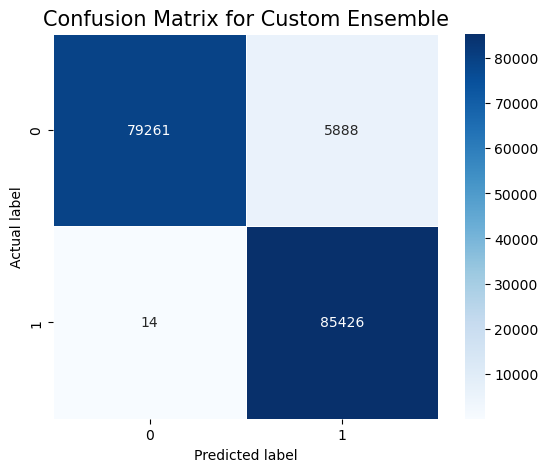

In [42]:

# Evaluating performance
print("Classification Report:")
print(classification_report(y_test, custom_predictions))

# Generate confusion matrix for custom ensemble predictions
cm_custom = confusion_matrix(y_test, custom_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm_custom, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Custom Ensemble', size=15)
plt.show()


In [37]:

# Assuming 'model' is your trained Keras model from the above code
nn_probs_lower = model.predict(X_test.values)[:, 0]  # Get probabilities for the positive class

# Get probabilities from other models
rf_probs = rf.predict_proba(X_test)[:, 1]
dt_probs = dtc.predict_proba(X_test)[:, 1]
svc_probs = svc.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]

# Combine probabilities - here using max, but consider weighted average based on model performance
combined_probs_lower = np.max([rf_probs, dt_probs, svc_probs, knn_probs, nn_probs], axis=0)

# Set a custom threshold to minimize false negatives
threshold_lower = 0.009  # Adjust this threshold as needed
custom_predictions_lower = (combined_probs_lower > threshold_lower).astype(int)




5331/5331 [==============================] - 4s 718us/step


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     85149
           1       0.80      1.00      0.89     85440

    accuracy                           0.87    170589
   macro avg       0.90      0.87      0.87    170589
weighted avg       0.90      0.87      0.87    170589



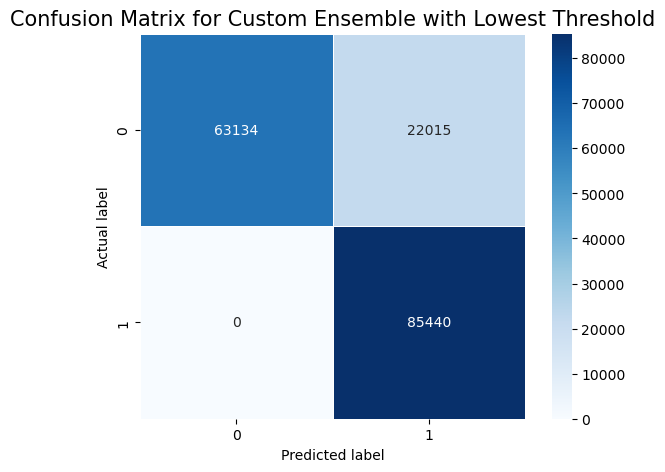

In [38]:

# Evaluating performance
print("Classification Report:")
print(classification_report(y_test, custom_predictions_lower))

# Generate confusion matrix for custom ensemble predictions
cm_custom_lower = confusion_matrix(y_test, custom_predictions_lower)

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm_custom_lower, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Custom Ensemble with Lowest Threshold', size=15)
plt.show()


## Very excited with these results.  Given the context and importance of accurately detecting fraud, this custom ensemble model is the clear winner due to its correctly detecting 100% of instances of actual fraud. 

## While the overall accuracy of this model is significantly lower than the top performing individual model, the Random Forest Classifier, this is a better model overall.  This model, with access to more data for training, and transactions in real-time, could automatically flag and prevent fraudulent transactions by requiring a customer confirmation that the transaction was legitimate. 

## It is unfortunate that I have no way of knowing if the split of fraudulent and non-fraudulent transactions contains suspicious but not fraudulent transactions, or simply normal transactions.

## I would love to get my hands on more data.  Several models show promise, but first I need a more realistic pipeline of transactions, the majority of which will not be fraudulent, in sharp contrast with the 50 / 50 split of this dataset.